In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs, make_circles

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
x,y = make_blobs(n_samples=50,centers=2)

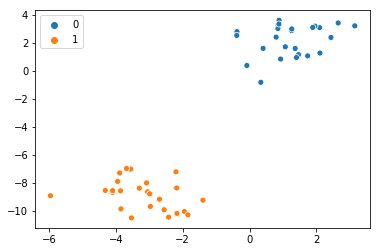

In [5]:
sns.scatterplot(x[:,0],x[:,1],hue=y)

In [6]:
x1,y1 = make_circles(n_samples=50)

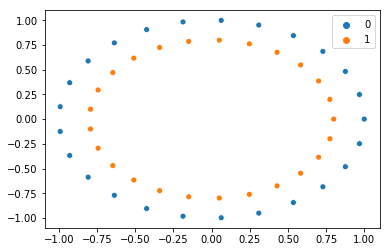

In [7]:
sns.scatterplot(x1[:,0],x1[:,1],hue=y1)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model_log1 = LogisticRegression()
model_log2 = LogisticRegression()

### Split the data

In [10]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2)

In [12]:
x_train1.shape, x_test1.shape,y_train1.shape,y_test1.shape

((40, 2), (10, 2), (40,), (10,))

### Training Logistic Regression
> default probability = 0.5

In [13]:
model_log1.fit(x_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### testing

In [14]:
y_pred = model_log1.predict(x_test1)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [15]:
y_test1

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [16]:
print('coefficient =',model_log1.coef_)
print('intercept = ',model_log1.intercept_)

coefficient = [[-0.63891489 -0.81530919]]
intercept =  [-0.92740458]


In [17]:
# equation
#0 = model_log1.intercept_[0]  + model_log1.coef_[0][0]*x[:,0] + model_log1.coef_[0][1]*x[:,1]

x2pred = (-model_log1.intercept_[0]  - model_log1.coef_[0][0]*x[:,0])/ model_log1.coef_[0][1]

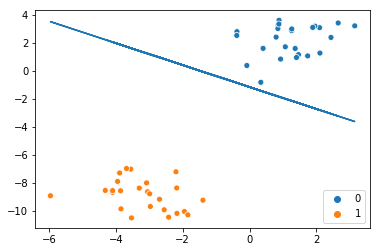

In [18]:
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.plot(x[:,0],x2pred)

# Confusion Matrix

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
cm = confusion_matrix(y_test1,y_pred)
cm

array([[7, 0],
       [0, 3]], dtype=int64)

In [21]:
cr = classification_report(y_test1,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        10



In [22]:
y_pred_prb = model_log1.predict_proba(x_test1)

In [23]:
prob = y_pred_prb[:,1]

In [24]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test1,prob)

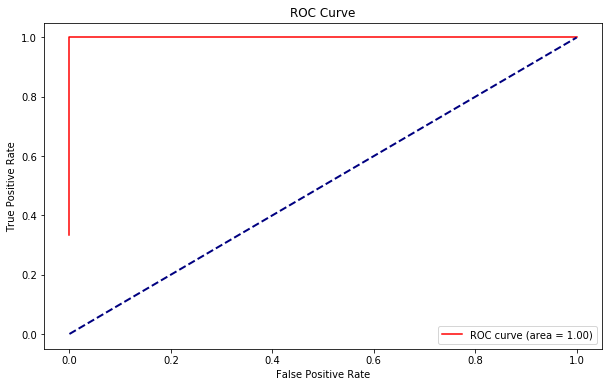

In [25]:


plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

# Data 2

coefficient = [[-0.233471    0.10234922]]
intercept =  [0.09352403]
[[2 4]
 [2 2]]
             precision    recall  f1-score   support

          0       0.50      0.33      0.40         6
          1       0.33      0.50      0.40         4

avg / total       0.43      0.40      0.40        10

 


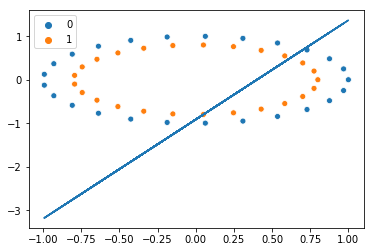

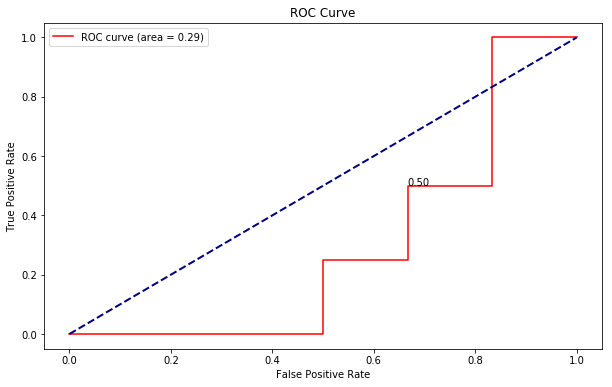

In [31]:
from sklearn.cross_validation import train_test_split

x_train2,x_test2,y_train2,y_test2 = train_test_split(x1,y1,test_size=0.2)

#x_train1.shape, x_test1.shape,y_train1.shape,y_test1.shape

### Training Logistic Regression
#default probability = 0.5

model_log2.fit(x_train2,y_train2)

### testing

y_pred = model_log2.predict(x_test2)


print('coefficient =',model_log2.coef_)
print('intercept = ',model_log2.intercept_)


# equation
#0 = model_log1.intercept_[0]  + model_log1.coef_[0][0]*x[:,0] + model_log1.coef_[0][1]*x[:,1]

x2pred1 = (-model_log2.intercept_[0]- model_log2.coef_[0][0]*x1[:,0])/ model_log2.coef_[0][1]

sns.scatterplot(x1[:,0],x1[:,1],hue=y1)
plt.plot(x1[:,0],x2pred1)

# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

cm = confusion_matrix(y_test2,y_pred)
print(cm)

cr = classification_report(y_test2,y_pred)
print(cr)





y_pred_prb = model_log2.predict_proba(x_test2)

prob = y_pred_prb[:,1]

from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test2,prob)



plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

In [32]:
from pandas_ml import ConfusionMatrix

In [33]:
cm = ConfusionMatrix(y_test2,y_pred)

In [34]:
cm

Predicted  False  True  __all__
Actual                         
False          2     4        6
True           2     2        4
__all__        4     6       10

In [35]:
cm.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.4),
             ('95% CI', (0.12155225811982723, 0.7376219233930549)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9452381183999999),
             ('Kappa', -0.15384615384615377),
             ("Mcnemar's Test P-Value", 'ToDo')])

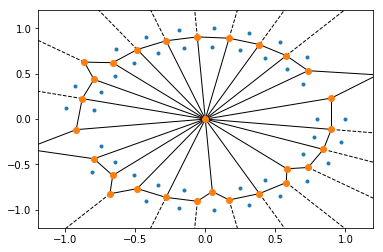

In [36]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train2)
voronoi_plot_2d(vor)
plt.show()

#### K Nearest Neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Testing

In [39]:
y_pred_knn = model_knn.predict(x_test2)

In [40]:
cm_knn = ConfusionMatrix(y_test2,y_pred_knn)
cm_knn

Predicted  False  True  __all__
Actual                         
False          2     4        6
True           0     4        4
__all__        2     8       10

In [41]:
cm_knn.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.6),
             ('95% CI', (0.2623780766069451, 0.8784477418801728)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.9672065024000001),
             ('Kappa', 0.28571428571428564),
             ("Mcnemar's Test P-Value", 'ToDo')])

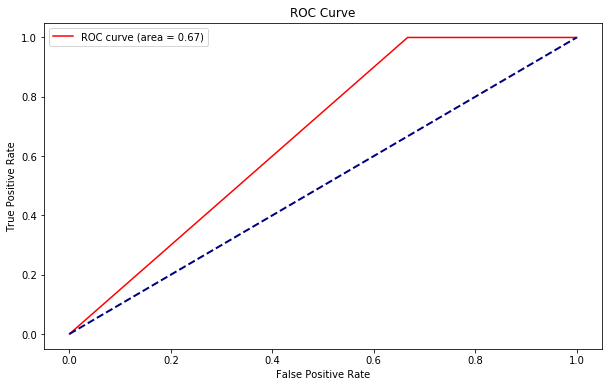

In [43]:
y_pred_prb = model_knn.predict_proba(x_test2)

prob = y_pred_prb[:,1]

from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test2,prob)



plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

# SVM

In [45]:
from sklearn.svm import SVC

In [85]:
model_svm = SVC(kernel='rbf',probability=True,C=5.0)

In [86]:
model_svm.fit(x_train2,y_train2)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
y_pred = model_svm.predict(x_test2)

In [88]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [89]:
model_svm.score(x_test2,y_test2)

1.0

In [90]:
cm_svm = ConfusionMatrix(y_test2,y_pred)

In [91]:
cm_svm

Predicted  False  True  __all__
Actual                         
False          6     0        6
True           0     4        4
__all__        6     4       10

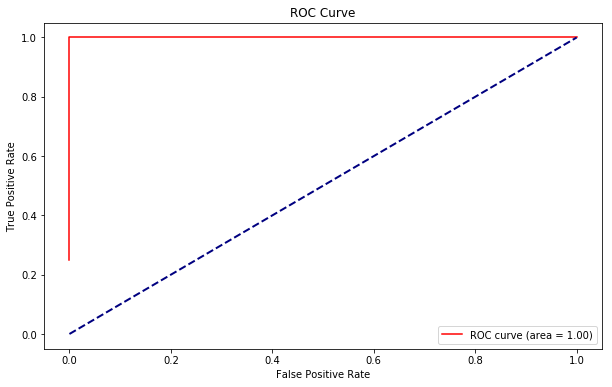

In [92]:
y_pred_prb = model_svm.predict_proba(x_test2)

prob = y_pred_prb[:,1]

from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test2,prob)



plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

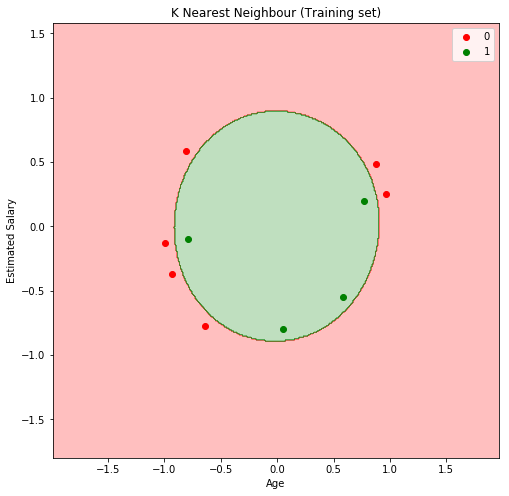

In [93]:
# Visualising the Training set results
plt.figure(figsize =(8,8))
from matplotlib.colors import ListedColormap
X_set, y_set = x_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               color = ['red', 'green'][i], label = j)

#plt.scatter(X_set[:,0],X_set[:,1] ,color = 'blue')
    
plt.title('K Nearest Neighbour (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()